In [7]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-04-01T09:30:04.932Z', 'error_code': 0, 'error_message': None, 'elapsed': 19, 'credit_count': 1, 'notice': "You have used 112% of your plan's daily credit limit.", 'total_count': 9105}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10135, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capit

In [8]:
type(data)

dict

In [9]:
import pandas as pd

In [10]:
pd.set_option('display.max_columns', None) #permet de voir toutes les colonnes

df = pd.json_normalize(data['data']) #mettre les données sous forme de tableau
df['timestamp'] = pd.to_datetime('now') #prend la date actuelle (rn), on ajoute ce timestamp
df

C:\Users\Boomi\AppData\Local\Temp\ipykernel_7880\2135677228.py:4: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now') #prend la date actuelle (rn), on ajoute ce timestamp


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10135,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.933394e+07,1.933394e+07,NaN,1,NaN,NaN,None,2023-04-01T09:27:00.000Z,28446.044564,1.667562e+10,-15.5698,0.109785,2.095119,3.768634,21.360489,24.098253,72.115334,5.499740e+11,46.4258,5.973669e+11,None,2023-04-01T09:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-01 09:30:12.405762
1,1027,Ethereum,ETH,ethereum,6677,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.204578e+08,1.204578e+08,NaN,2,NaN,NaN,None,2023-04-01T09:27:00.000Z,1827.086269,8.428037e+09,-0.8441,0.198196,1.916857,4.785495,11.100219,16.126310,52.856708,2.200867e+11,18.5758,2.200867e+11,None,2023-04-01T09:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-01 09:30:12.405762
2,825,Tether,USDT,tether,50544,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,7.969386e+10,8.309174e+10,NaN,3,NaN,NaN,None,2023-04-01T09:27:00.000Z,1.000144,2.723908e+10,-8.5569,-0.018151,-0.006700,-0.066662,0.001614,0.004805,0.053370,7.970535e+10,6.7273,8.310371e+10,None,2023-04-01T09:27:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-01 09:30:12.405762
3,1839,BNB,BNB,bnb,1240,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.578884e+08,1.599800e+08,NaN,4,NaN,NaN,None,2023-04-01T09:27:00.000Z,315.129360,4.126173e+08,-6.9892,0.153280,-0.359295,-2.444095,5.570312,1.208386,29.253143,4.975527e+10,4.2001,5.041438e+10,None,2023-04-01T09:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-01 09:30:12.405762
4,3408,USD Coin,USDC,usd-coin,11269,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.252736e+10,3.252736e+10,NaN,5,NaN,NaN,None,2023-04-01T09:27:00.000Z,0.999777,3.690244e+09,-13.9407,-0.014899,-0.020110,0.007445,-0.029780,-0.036480,-0.031129,3.252012e+10,2.7448,3.252012e+10,None,2023-04-01T09:27:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-01 09:30:12.405762
5,52,XRP,XRP,xrp,923,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.167819e+10,9.998906e+10,NaN,6,NaN,NaN,None,2023-04-01T09:27:00.000Z,0.505635,1.981909e+09,-12.1870,0.140901,-4.813966,14.459020,33.604191,26.900474,50.039029,2.613032e+10,2.2058,5.056355e+10,None,2023-04-01T09:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-01 09:30:12.405762
6,2010,Cardano,ADA,cardano,756,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.474267e+10,3.564336e+10,NaN,7,NaN,NaN,None,2023-04-01T09:27:00.000Z,0.391068,6.575801e+08,79.0009,0.005026,1.790764,8.659409,10.221460,4.484339,59.897448,1.358676e+10,1.1468,1.759808e+10,None,2023-04-01T09:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-01 09:30:12.405762
7,74,Dogecoin,DOGE,dogecoin,672,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.387573e+11,1.387573e+11,NaN,8,NaN,NaN,None,2023-04-01T09:27:00.000Z,0.077011,4.641516e+08,59.0999,0.058005,3.692878,3.483012,-4.706033,-16.886116,10.705432,1.068582e+10,0.9019,1.068582e+10,None,2023-04-01T09:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-01 09:30:12.405762
8,3890,Polygon,MATIC,polygon,641,2019-04-28T00:00:00.000Z,"[platform, enterprise-solutions, zero-knowledg...",1.000000e+10,9.080469e+09,1.000000e+10,NaN,9,NaN,NaN,None,2023-04-01T09:

In [11]:
#on veut automatiser le process pour avoir les données disponibles à l'utilisation

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df2 = pd.json_normalize(data['data']) #mettre les données sous forme de tableau
    df2['timestamp'] = pd.to_datetime('now') #prend la date actuelle (rn), on ajoute ce timestamp
    df_append = pd.DataFrame(df2)
    df = pd.concat([df2,df_append])

    if not os.path.isfile(r'C:\Users\Boomi\Desktop\projects/API.csv'):
        df.to_csv(r'C:\Users\Boomi\Desktop\projects/API.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\Boomi\Desktop\projects/API.csv', mode='a', header=False)
        
    #va voir si il y a déjà un fichier qui a le nom, et va créer le fichier csv

In [12]:
import os
from time import time
from time import sleep
#on va maintenant créer notre loop. On va pouvoir tracker le temps

for i in range(333): #on a que 333 run pour une journée (site)
    api_runner()
    print('API Runner completed')
    sleep(60) #run every minute, sleep for 1 min
exit()
#la loop va appeler api, va dire que c'est à bien tourner et attendre 60 sec

{'status': {'timestamp': '2023-04-01T09:30:20.367Z', 'error_code': 0, 'error_message': None, 'elapsed': 28, 'credit_count': 1, 'notice': "You have used 112% of your plan's daily credit limit.", 'total_count': 9105}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10135, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capit

C:\Users\Boomi\AppData\Local\Temp\ipykernel_7880\3208384339.py:27: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['timestamp'] = pd.to_datetime('now') #prend la date actuelle (rn), on ajoute ce timestamp


KeyboardInterrupt: 

In [13]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10135,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.933394e+07,1.933394e+07,NaN,1,NaN,NaN,None,2023-04-01T09:28:00.000Z,28437.551176,1.665749e+10,-15.7395,0.066909,2.109386,3.653721,21.320702,24.045276,72.044907,5.498098e+11,46.4073,5.971886e+11,None,2023-04-01T09:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-01 09:30:20.764027
1,1027,Ethereum,ETH,ethereum,6677,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.204578e+08,1.204578e+08,NaN,2,NaN,NaN,None,2023-04-01T09:28:00.000Z,1826.606318,8.427998e+09,-0.8987,0.130495,1.925052,4.709866,11.063765,16.068283,52.793511,2.200289e+11,18.5709,2.200289e+11,None,2023-04-01T09:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-01 09:30:20.764027
2,825,Tether,USDT,tether,50544,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,7.969386e+10,8.309174e+10,NaN,3,NaN,NaN,None,2023-04-01T09:28:00.000Z,1.000274,2.721684e+10,-8.6912,0.004312,-0.001580,-0.071353,0.015195,0.019061,0.062244,7.971573e+10,6.7282,8.311454e+10,None,2023-04-01T09:28:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-01 09:30:20.764027
3,1839,BNB,BNB,bnb,1240,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.578884e+08,1.599800e+08,NaN,4,NaN,NaN,None,2023-04-01T09:28:00.000Z,315.075110,4.125399e+08,-6.9945,0.145570,-0.411855,-2.467673,5.549981,1.185296,29.201260,4.974671e+10,4.1989,5.040570e+10,None,2023-04-01T09:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-01 09:30:20.764027
4,3408,USD Coin,USDC,usd-coin,11269,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.252736e+10,3.252736e+10,NaN,5,NaN,NaN,None,2023-04-01T09:28:00.000Z,0.999873,3.686541e+09,-13.9949,0.004755,-0.019298,-0.008616,-0.009190,-0.023149,-0.017480,3.252324e+10,2.7450,3.252324e+10,None,2023-04-01T09:28:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-01 09:30:20.764027
5,52,XRP,XRP,xrp,923,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.167819e+10,9.998906e+10,NaN,6,NaN,NaN,None,2023-04-01T09:28:00.000Z,0.505613,1.980672e+09,-12.3336,0.812211,-4.989450,14.227962,33.572250,26.818443,49.996482,2.612914e+10,2.2055,5.056126e+10,None,2023-04-01T09:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-01 09:30:20.764027
6,2010,Cardano,ADA,cardano,756,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.474267e+10,3.564336e+10,NaN,7,NaN,NaN,None,2023-04-01T09:28:00.000Z,0.390750,6.574137e+08,78.8633,0.011096,1.681406,8.597227,10.157477,4.355345,59.650943,1.357570e+10,1.1458,1.758375e+10,None,2023-04-01T09:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-01 09:30:20.764027
7,74,Dogecoin,DOGE,dogecoin,672,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.387573e+11,1.387573e+11,NaN,8,NaN,NaN,None,2023-04-01T09:28:00.000Z,0.076974,4.641433e+08,59.0398,0.067271,3.577984,3.459045,-4.756615,-16.974879,10.611446,1.068066e+10,0.9015,1.068066e+10,None,2023-04-01T09:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-01 09:30:20.764027
8,3890,Polygon,MATIC,polygon,641,2019-04-28T00:00:00.000Z,"[platform, enterprise-solutions, zero-knowledg...",1.000000e+10,9.080469e+09,1.000000e+10,NaN,9,NaN,NaN,None,2023-04-01T09:2

In [14]:
pd.set_option('display.float_format', lambda x:'%.5f' % x) 
#rendre le données plus propres, mettre des décimales (changement de format to float)

In [15]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10135,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19333937.00000,19333937.00000,NaN,1,NaN,NaN,None,2023-04-01T09:28:00.000Z,28437.55118,16657485511.24287,-15.73950,0.06691,2.10939,3.65372,21.32070,24.04528,72.04491,549809822865.30737,46.40730,597188574689.75000,None,2023-04-01T09:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-01 09:30:20.764027
1,1027,Ethereum,ETH,ethereum,6677,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120457776.00000,120457776.00000,NaN,2,NaN,NaN,None,2023-04-01T09:28:00.000Z,1826.60632,8427997658.36700,-0.89870,0.13049,1.92505,4.70987,11.06377,16.06828,52.79351,220028934671.55331,18.57090,220028934671.54999,None,2023-04-01T09:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-01 09:30:20.764027
2,825,Tether,USDT,tether,50544,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,79693860816.00850,83091735571.92152,NaN,3,NaN,NaN,None,2023-04-01T09:28:00.000Z,1.00027,27216835023.43602,-8.69120,0.00431,-0.00158,-0.07135,0.01520,0.01906,0.06224,79715732877.70230,6.72820,83114540183.82001,None,2023-04-01T09:28:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-01 09:30:20.764027
3,1839,BNB,BNB,bnb,1240,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,157888406.08503,159979963.59043,NaN,4,NaN,NaN,None,2023-04-01T09:28:00.000Z,315.07511,412539875.88790,-6.99450,0.14557,-0.41185,-2.46767,5.54998,1.18530,29.20126,49746706961.88636,4.19890,50405704673.59000,None,2023-04-01T09:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-01 09:30:20.764027
4,3408,USD Coin,USDC,usd-coin,11269,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,32527362415.56126,32527362415.56126,NaN,5,NaN,NaN,None,2023-04-01T09:28:00.000Z,0.99987,3686540895.22550,-13.99490,0.00475,-0.01930,-0.00862,-0.00919,-0.02315,-0.01748,32523243610.93237,2.74500,32523243610.93000,None,2023-04-01T09:28:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-01 09:30:20.764027
5,52,XRP,XRP,xrp,923,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,51678187732.00000,99989057196.00000,NaN,6,NaN,NaN,None,2023-04-01T09:28:00.000Z,0.50561,1980671506.14327,-12.33360,0.81221,-4.98945,14.22796,33.57225,26.81844,49.99648,26129142686.92907,2.20550,50561259660.33000,None,2023-04-01T09:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-01 09:30:20.764027
6,2010,Cardano,ADA,cardano,756,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34742673468.28200,35643358227.61100,NaN,7,NaN,NaN,None,2023-04-01T09:28:00.000Z,0.39075,657413676.87372,78.86330,0.01110,1.68141,8.59723,10.15748,4.35535,59.65094,13575699813.74840,1.14580,17583750202.08000,None,2023-04-01T09:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-01 09:30:20.764027
7,74,Dogecoin,DOGE,dogecoin,672,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,138757256383.70523,138757256383.70523,NaN,8,NaN,NaN,None,2023-04-01T09:28:00.000Z,0.07697,464143342.58448,59.03980,0.06727,3.57798,3.45905,-4.75662,-16.97488,10.61145,10680656942.22962,0.90150,10680656942.23000,None,2023-04-01T09:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-01 09:30:20.764027
8,3890,Polygon,MATI

In [16]:
#on va regrouper les noms
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.06691,2.10939,3.65372,21.32070,24.04528,72.04491
Ethereum,0.13049,1.92505,4.70987,11.06377,16.06828,52.79351
Tether,0.00431,-0.00158,-0.07135,0.01520,0.01906,0.06224
BNB,0.14557,-0.41185,-2.46767,5.54998,1.18530,29.20126
USD Coin,0.00475,-0.01930,-0.00862,-0.00919,-0.02315,-0.01748
XRP,0.81221,-4.98945,14.22796,33.57225,26.81844,49.99648
Cardano,0.01110,1.68141,8.59723,10.15748,4.35535,59.65094
Dogecoin,0.06727,3.57798,3.45905,-4.75662,-16.97488,10.61145
Polygon,0.35114,2.45104,1.69813,-8.44856,1.98605,47.48562


In [17]:
#on veut améliorer la vizualisation, et ne pas avoir le % en colomne
# on va stack

df4 = df3.stack()
df4
 

name                                 
Bitcoin  quote.USD.percent_change_1h     0.06691
         quote.USD.percent_change_24h    2.10939
         quote.USD.percent_change_7d     3.65372
         quote.USD.percent_change_30d   21.32070
         quote.USD.percent_change_60d   24.04528
                                          ...   
TRON     quote.USD.percent_change_24h    1.56749
         quote.USD.percent_change_7d     3.69573
         quote.USD.percent_change_30d   -4.66906
         quote.USD.percent_change_60d    5.99341
         quote.USD.percent_change_90d   21.35319
Length: 90, dtype: float64

In [18]:
type(df4)

pandas.core.series.Series

In [19]:
df5 = df4.to_frame(name='valeurs')
df5

valeurs
name                                         
Bitcoin quote.USD.percent_change_1h   0.06691
        quote.USD.percent_change_24h  2.10939
        quote.USD.percent_change_7d   3.65372
        quote.USD.percent_change_30d 21.32070
        quote.USD.percent_change_60d 24.04528
...                                       ...
TRON    quote.USD.percent_change_24h  1.56749
        quote.USD.percent_change_7d   3.69573
        quote.USD.percent_change_30d -4.66906
        quote.USD.percent_change_60d  5.99341
        quote.USD.percent_change_90d 21.35319

[90 rows x 1 columns]

In [20]:
df5.count()

valeurs    90
dtype: int64

In [21]:
#on va créer un index
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,valeurs
0,Bitcoin,quote.USD.percent_change_1h,0.06691
1,Bitcoin,quote.USD.percent_change_24h,2.10939
2,Bitcoin,quote.USD.percent_change_7d,3.65372
3,Bitcoin,quote.USD.percent_change_30d,21.32070
4,Bitcoin,quote.USD.percent_change_60d,24.04528
...,...,...,...
85,TRON,quote.USD.percent_change_24h,1.56749
86,TRON,quote.USD.percent_change_7d,3.69573
87,TRON,quote.USD.percent_change_30d,-4.66906
88,TRON,quote.USD.percent_change_60d,5.99341


In [22]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,valeurs
0,Bitcoin,quote.USD.percent_change_1h,0.06691
1,Bitcoin,quote.USD.percent_change_24h,2.10939
2,Bitcoin,quote.USD.percent_change_7d,3.65372
3,Bitcoin,quote.USD.percent_change_30d,21.32070
4,Bitcoin,quote.USD.percent_change_60d,24.04528
...,...,...,...
85,TRON,quote.USD.percent_change_24h,1.56749
86,TRON,quote.USD.percent_change_7d,3.69573
87,TRON,quote.USD.percent_change_30d,-4.66906
88,TRON,quote.USD.percent_change_60d,5.99341


In [23]:
#on renomme le nom des valeurs 
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'],['1h', '24h', '7d', '30d', '60d', '90d'])
df7

,name,percent_change,valeurs
0,Bitcoin,1h,0.06691
1,Bitcoin,24h,2.10939
2,Bitcoin,7d,3.65372
3,Bitcoin,30d,21.32070
4,Bitcoin,60d,24.04528
...,...,...,...
85,TRON,24h,1.56749
86,TRON,7d,3.69573
87,TRON,30d,-4.66906
88,TRON,60d,5.99341


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

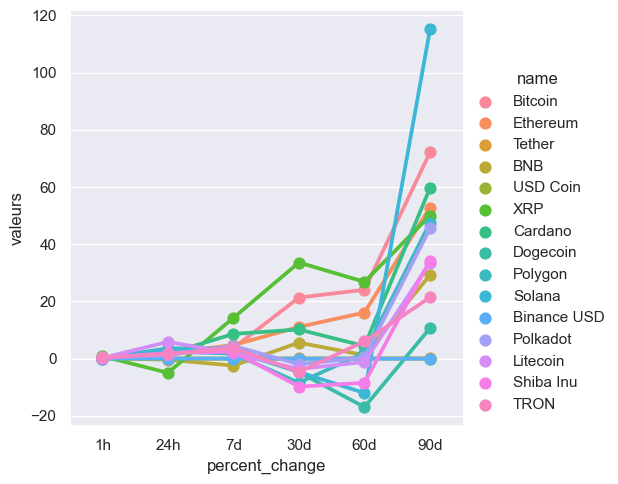

In [25]:
sns.set_theme(style="darkgrid")
sns.catplot(x='percent_change', y='valeurs', hue='name', data=df7, kind='point')

In [26]:
df8 = df[['name', 'quote.USD.price', 'timestamp']]

#on veut juste regarder le bitcoin
df8 = df8.query("name == 'Bitcoin'")
df8

,name,quote.USD.price,timestamp
0,Bitcoin,28437.55118,2023-04-01 09:30:20.764027
0,Bitcoin,28437.55118,2023-04-01 09:30:20.764027


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

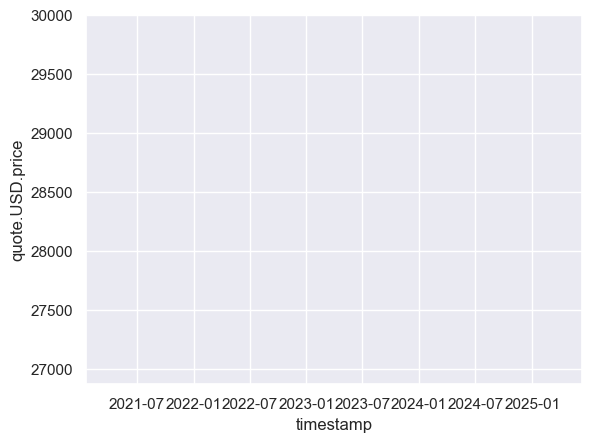

In [29]:
#pour visualiser ça simplement
sns.set_theme(style="darkgrid")
sns.lineplot(x='timestamp', y='quote.USD.price', data=df8)